# Rabbits and foxes

There are initially 400 rabbits and 200 foxes on a farm (but it could be two cell types in a 96 well plate or something, if you prefer bio-engineering analogies). Plot the concentration of foxes and rabbits as a function of time for a period of up to 600 days. The predator-prey relationships are given by the following set of coupled ordinary differential equations:

\begin{align}
\frac{dR}{dt} &= k_1 R - k_2 R F \tag{1}\\
\frac{dF}{dt} &= k_3 R F - k_4 F \tag{2}\\
\end{align}

* Constant for growth of rabbits $k_1 = 0.015$ day<sup>-1</sup>
* Constant for death of rabbits being eaten by foxes $k_2 = 0.00004$ day<sup>-1</sup> foxes<sup>-1</sup>
* Constant for growth of foxes after eating rabbits $k_3 = 0.0004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* Constant for death of foxes $k_1 = 0.04$ day<sup>-1</sup>

Also plot the number of foxes versus the number of rabbits.

Then try also with 
* $k_3 = 0.00004$ day<sup>-1</sup> rabbits<sup>-1</sup>
* $t_{final} = 800$ days

*This problem is based on one from Chapter 1 of H. Scott Fogler's textbook "Essentials of Chemical Reaction Engineering".*


# Solving ODEs

*Much of the following content reused under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth. Partly based on David Ketcheson's pendulum lesson, also under CC-BY. https://github.com/numerical-mooc/numerical-mooc*

Let's step back for a moment. Suppose we have a first-order ODE $u'=f(u)$. You know that if we were to integrate this, there would be an arbitrary constant of integration. To find its value, we do need to know one point on the curve $(t, u)$. When the derivative in the ODE is with respect to time, we call that point the _initial value_ and write something like this:

$$u(t=0)=u_0$$

In the case of a second-order ODE, we already saw how to write it as a system of first-order ODEs, and we would need an initial value for each equation: two conditions are needed to determine our constants of integration. The same applies for higher-order ODEs: if it is of order $n$, we can write it as $n$ first-order equations, and we need $n$ known values. If we have that data, we call the problem an _initial value problem_.

Remember the definition of a derivative? The derivative represents the slope of the tangent at a point of the curve $u=u(t)$, and the definition of the derivative $u'$ for a function is:

$$u'(t) = \lim_{\Delta t\rightarrow 0} \frac{u(t+\Delta t)-u(t)}{\Delta t}$$

If the step $\Delta t$ is already very small, we can _approximate_ the derivative by dropping the limit. We can write:

$$\begin{equation}
u(t+\Delta t) \approx u(t) + u'(t) \Delta t
\end{equation}$$

With this equation, and because we know $u'(t)=f(u)$, if we have an initial value, we can step by $\Delta t$ and find the value of $u(t+\Delta t)$, then we can take this value, and find $u(t+2\Delta t)$, and so on: we say that we _step in time_, numerically finding the solution $u(t)$ for a range of values: $t_1, t_2, t_3 \cdots$, each separated by $\Delta t$. The numerical solution of the ODE is simply the table of values $t_i, u_i$ that results from this process.


# Euler's method
*Also known as "Simple Euler" or sometimes "Simple Error".*

The approximate solution at time $t_n$ is $u_n$, and the numerical solution of the differential equation consists of computing a sequence of approximate solutions by the following formula, based on Equation (10):

$$u_{n+1} = u_n + \Delta t \,f(u_n).$$

This formula is called **Euler's method**.

For the equations of the rabbits and foxes, Euler's method gives the following algorithm that we need to implement in code:

\begin{align}
R_{n+1} & = R_n + \Delta t \left(k_1 R_n - k_2 R_n F_n \right) \\
F_{n+1} & = F_n + \Delta t \left( k_3 R_n F-n - k_4 F_n \right).
\end{align}


In [1]:
# Completed in class Euler's method assignment with Cameron Fulco.
# Import necessary libraries

import numpy as np
from matplotlib import pyplot as plt
import math
import random
from scipy.integrate import odeint
from scipy.signal import argrelextrema
%matplotlib inline

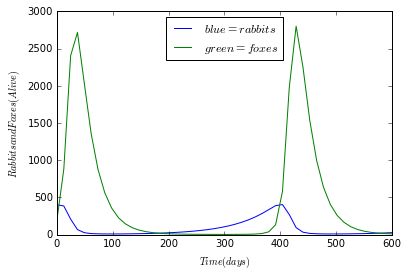

The location of the second peak is at at 2800 live foxes in 428 days


In [2]:
#Monte Carlo Assignment Part 1 - Using odeint and finding location of second foxes peak 

k1 = 0.015 #day^-1 (growth rate of rabbits)
k2 = 0.00004 #day^-1foxes^-1
k3 = 0.0004 #day^-1rabbits^-1
k4 = 0.04 #day^-1 (growth rate of foxes)

def dEverythingbydt(everything, t):
    R, F = everything
    r1 = k1*R - k2*R*F
    r2 = k3*R*F - k4*F
    dRdt = r1
    dFdt = r2
    return dRdt, dFdt

everything0 = np.array([400., 200.])
dEverythingbydt(everything0, 0)

t = np.linspace(0,600)
output = odeint(dEverythingbydt, everything0, t)
R, F = output.T

plt.plot(t, R, label='$blue=rabbits$')
plt.plot(t, F, label = '$green=foxes$')
plt.legend(loc="best")
plt.xlabel("$Time (days) $")
plt.ylabel("$Rabbits and Foxes(Alive) $")
plt.show()

A = (F[argrelextrema(F, np.greater_equal,order=10)])
B = int(A[1])
C = t[35]
D = int(C)
print("The location of the second peak is at at", B, "live foxes in", D, "days")

In [3]:
# Monte Carlo Assingment Part 2 - Using Monte Carlo Algorithm Determine:
# 1. The expected location of the second peak in foxes (eg. 425 days, 2800 foxes), on occasions that there is one (eg. a peak that's  >200 days and >100 foxes)
# 2. The interquartile range of the second peak in foxes (eg. 411-443 days, 2700-3120 foxes).
# 3. The probability that the foxes die out before 600 days are complete
# 4. List some things you learned from this assignment 

# The code contained below is not completely mine, copied and rearragned some code from Greg Zaylor's Monte Carlo assingment. KH 05OCT16

def MonteCarlo(times):
    t = [0]
    days = 0.
    R = [400]
    F = [200]
    RF = [400,200]
    
    while times>days:
        r1 = k1*RF[0]
        r2 = k2*RF[0]*RF[1]
        r3 = k3*RF[0]*RF[1]
        r4 = k4*RF[1]
        RATES = r1+r2+r3+r4
        e = random.random()
        check = RATES*e
        
        if check<=r1:
            RF[0]=RF[0]+1
            RF[1]=RF[1]
        elif r1<check<=r1+r2:
            RF[0]=RF[0]-1
            RF[1]=RF[1]
        elif r1+r2<check<=r1+r2+r3:
            RF[0]=RF[0]
            RF[1]=RF[1]+1
        else:
            RF[0]=RF[0]
            RF[1]=RF[1]-1
            
        R.append(RF[0])
        F.append(RF[1])
        
        dt=math.log((1/e))/RATES
        days = days+dt
        t.append(days)
        
        if RF[1]==0:
            break
            
    return (R,F,t,FD)

In [ ]:
Iterations = 500
FAP =[0]
TAP = [0]
FD = [0]

for i in range(Iterations):
    Answer = MonteCarlo(600)
    plt.plot(Answer[2],Answer[0],'blue')
    plt.plot(Answer[2],Answer[1],'orange')
    
    time = (Answer[2])
    foxes = (Answer[1])
    rabbits = (Answer[0])
    d = 12000
    foxes[:d]=[0]*d
    f = max(foxes)
    
    if d>12000:
        for p, item in enumerate(foxes):
            if item == f:
                FAP.append(f)
                TAP.append(Answer[2][p])
                break
        else:
            FD =FD+1    

In [18]:
print("The second peak occurs at ", round(sum(FAP)/float((len(FAP)-1))), "foxes which occurs at", round(sum(TAP)/float((len(TAP)-1))), "days")

ZeroDivisionError: float division by zero

In [ ]:
# List of some things that I learned from this assignment
# 1. Learned how to use argrelextrema from scipy.signal library
# 2. Learned how to implement a Kinetic Monte Carlo (KMC) simulation
# 3. Learned more about the capabilities of if/else/while statements both within and outside of a for loop
# 4. Learned through practice how to use git, gitbash, and github more effectively 
# 5. Learned that I need to allocate more time to complete HW assingments and submit them the way I want to. 

#Did not complete HW. Mismanaged my time and resources with this assingment. 